Codecademy Machine Learning in Python Capstone Project (data has been provided by codecademy)
By: Carter McKinnon
Goal: To predict a person's body type based on several factors, including -- Diet, Drinking Habits, Drug use, Age, Sex, Income, Smoking Habits, and Favorite Things to Do.

In [2]:
# Importing relevant packages and loading the profile data into a dataframe
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

class format_data:
    def __init__ (self, dataframe):
        self.dataframe = dataframe
        
    # function that removes NaN values, replaces column values based on array of dictionary values, and scales data
    def remove_nan_replace (self, column_arr, replacement_values_arr):
        for column in column_arr:
            for i in range(len(replacement_values_arr)):
                self.dataframe[column].replace(replacement_values_arr[i], inplace=True)
            
            self.dataframe[column].dropna(axis=0, how='any', inplace=True)
        
        return self.dataframe

    # def prep_train_sentiment (self, train_data, labels):
    
    # def how_many_neighbors(train_data, test_data, train_labels, test_labels, graph=True):


        

profile_data = pd.read_csv("profiles.csv")

Viewing the relevant columns to see the values 

Diet: mostly anything, anything, strictly anything, mostly vegetarian, mostly other, strictly vegitarian, vegetarian, strictly other, mostly vegan, other, strictly vegan, vegan, mostly kosher, mostly halal, strictly halal, strictly kosher, halal, kosher, NaN

Drinks: not at all, rarely, socially, often, very often, desperately, NaN

Drugs: never, sometimes, often, NaN

Age: age number

Education: graduated from college/university, NaN

Smokes: no, sometimes, when drinking, yes, trying to quit, NaN

Income: 20000, 30000, 40000, 50000, 60000, 70000, 80000, 100000, 150000, 250000, 500000, 1000000, -1

Body_Type: average, fit, athletic, thin, curvy, a little extra, skinny, full figured, overweight, jacked, user up, rather not say, NaN

In [2]:
# profile_data['diet'].value_counts()
# profile_data['drinks'].value_counts()
# profile_data['drugs'].value_counts()
# profile_data['sex'].value_counts()
# profile_data['income'].value_counts()
# profile_data['smokes'].value_counts()
# profile_data['body_type'].value_counts()

Remapping the Data

Diet: mostly anything: 1, anything: 2, strictly anything: 3, mostly vegetarian: 4, mostly other: 5, strictly vegetarian: 6, vegetarian: 7, strictly other: 8, mostly vegan: 9, other: 10, strictly vegan: 11, vegan: 12, mostly kosher: 13, mostly halal: 14, strictly halal: 15, strictly kosher: 16, halal: 17, kosher: 18, NaN

Drinks: not at all: 1, rarely: 2, socially: 3, often: 4, very often: 5, desperately: 6, NaN

Drugs: never: 1, sometimes: 2, often: 3, NaN

Sex: m: 1, f: 0

Smokes: no: 1, sometimes: 2, when drinking: 3, yes: 4, trying to quit: 5, NaN

Income: 20000, 30000, 40000, 50000, 60000, 70000, 80000, 100000, 150000, 250000, 500000, 1000000, -1: NaN

Body_Type: average: 1, fit: 2, athletic: 3, thin: 4, curvy: 5, a little extra: 6, skinny: 7, full figured: 8, overweight: 9, jacked: 10, used up: 11, rather not say: 12, NaN

In [2]:
# creating a list of not null values
null_values = profile_data['body_type'].isna()
rows_to_drop = [i for i in range(len(null_values)) if not null_values[i]]

# creating new dataframe that does not contain rows where body type was n/a
cleaned_data = profile_data[profile_data.index.isin(rows_to_drop)]

# array of columns to use
column_array = ['diet', 'drinks', 'drugs', 'sex', 'smokes', 'income', 'body_type']

replacement_value_arr = [
    # diet
    {'mostly anything': 1, 'anything': 2, 'strictly anything': 3, 'mostly vegetarian': 4, 'mostly other': 5, 'strictly vegetarian': 6, 'vegetarian': 7, 'strictly other': 8, 'mostly vegan': 9, 'other': 10, 'strictly vegan': 11, 'vegan': 12, 'mostly kosher': 13, 'mostly halal': 14, 'strictly halal': 15, 'strictly kosher': 16, 'halal': 17, 'kosher': 18},
    # drinks
    {'not at all': 1, 'rarely': 2, 'socially': 3, 'often': 4, 'very often': 5, 'desperately': 6},
    # drugs
    {'never': 1, 'sometimes': 2, 'often': 3},
    # sex
    {'m': 1, 'f': 0},
    # smokes
    {'no': 1, 'sometimes': 2, 'when drinking': 3, 'yes': 4, 'trying to quit': 5},
    # income
    {-1: 0},
    # body type
    {'average': 1, 'fit': 2, 'athletic': 3, 'thin': 4, 'curvy': 5, 'a little extra': 6, 'skinny': 7, 'full figured': 8, 'overweight': 9, 'jacked': 10, 'used up': 11, 'rather not say': 12}
    ]

data = format_data(profile_data)
formatted_data = data.remove_nan_replace(column_array, replacement_value_arr)

# testing
# formatted_data['body_type'].value_counts()


       age       body_type               diet      drinks      drugs  \
0       22  a little extra  strictly anything    socially      never   
1       35         average       mostly other       often  sometimes   
2       38            thin           anything    socially        NaN   
3       23            thin         vegetarian    socially        NaN   
4       29        athletic                NaN    socially      never   
...    ...             ...                ...         ...        ...   
59938   48         average                NaN         NaN        NaN   
59942   24             fit    mostly anything       often  sometimes   
59943   42         average    mostly anything  not at all      never   
59944   27        athletic    mostly anything    socially      often   
59945   39         average                NaN    socially        NaN   

                               education  \
0          working on college/university   
1                  working on space camp   
2  

Setting up and training Bayes model to perform sentiment analysis on some of the essays to determine whether the person is positive or negative

I used a dataset from this source to train my model:

@incollection{SocherEtAl2013:RNTN,
title = {{Parsing With Compositional Vector Grammars}},
author = {Richard Socher and Alex Perelygin and Jean Wu and Jason Chuang and Christopher Manning and Andrew Ng and Christopher Potts},
booktitle = {{EMNLP}},
year = {2013}
}

In [3]:
# from sklearn.metrics import accuracy_score

bayes_train_data = pd.read_csv('bayes training set .csv')


# rounding all labels to one decimal point
labels_rounded = bayes_train_data['sentiment values'].apply(lambda x: round(x, 2))

# setting labels between 0-0.3 to 0, 0.31 - 0.6 as neutral, and 0.71 to 1 as positive
invalid_labels_counter = 0
for i in range(len(labels_rounded)):

    if labels_rounded[i] >= 0 and labels_rounded[i] < 0.5:
        labels_rounded[i] = 0
    elif labels_rounded[i] >= 0.5 and labels_rounded[i] <= 1:
        labels_rounded[i] = 1
    else:
        print('Label does not fall within acceptable range of 0-1')
        invalid_labels_counter += 1
# print(invalid_labels_counter)
        
# testing
# print(labels_rounded[:20])

# dropping na values
bayes_train_data['phrases'].dropna(axis=0, how='any', inplace=True)
labels_rounded.dropna(axis=0, how='any', inplace=True)

# ensuring all data is a string type (did this to avoid ValueErrors)
data_str = bayes_train_data['phrases'].apply(lambda x: np.str_(x))
labels_str = labels_rounded.apply(lambda x: np.str_(x))

data = data_str.to_list()
labels = labels_str.to_list()

# splitting the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

# setting up Tfidf Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(train_data)
train_counts = vectorizer.transform(train_data)
test_counts = vectorizer.transform(test_data)

# testing
# print(train_data[5])
# print(train_counts[5])

# setting up Multinominal Naive Bayes Classifier
bayes = MultinomialNB()
bayes.fit(train_counts, train_labels)
predictions = bayes.predict(test_counts)
score = accuracy_score(test_labels, predictions)
print(score)

# Acheived accuracy of 77.9% 


0.7793801074257529


Comparing the accuracy of Logistic Regression Classifier vs. Naive Bayes Classifier

Aiming for 80-85% accuracy because humans agree on sentiment 80-85% of the time

In [4]:
from sklearn.linear_model import LogisticRegression

log_data = pd.read_csv('bayes training set .csv')


# rounding all labels
labels_rounded = log_data['sentiment values'].apply(lambda x: round(x, 1))

# setting labels under 0.5 to 0 and 0.5 and over to be 1
invalid_counter = 0
for i in range(len(labels_rounded)):

    if labels_rounded[i] >= 0 and labels_rounded[i] < 0.5:
        labels_rounded[i] = 0
    
    elif labels_rounded[i] >= 0.5 and labels_rounded[i] <= 1:
        labels_rounded[i] = 1
    
    else:
        print('Label does not fall within acceptable range of 0-1')
        invalid_counter += 1
        
# testing
print(labels_rounded[:20])

# dropping na values
log_data['phrases'].dropna(axis=0, how='any', inplace=True)
labels_rounded.dropna(axis=0, how='any', inplace=True)

# ensuring all data is a string type (did this to avoid ValueErrors)
data_str = log_data['phrases'].apply(lambda x: np.str_(x))
labels_str = labels_rounded.apply(lambda x: np.str_(x))

# creating training and test sets of the data
log_train_data, log_test_data, log_train_labels, log_test_labels = train_test_split(data_str, labels_str, test_size=0.2, random_state=1)

# setting up Tfidf Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(log_train_data)
log_train_counts = vectorizer.transform(log_train_data)
log_test_counts = vectorizer.transform(log_test_data)

# scaling data
scaled_train_counts = scale(log_train_counts, with_mean=False)
scaled_test_counts = scale(log_test_counts, with_mean=False)

# starting the classifier
log_classifier = LogisticRegression(random_state=1, max_iter=600)
log_classifier.fit(scaled_train_counts, log_train_labels)
predictions = log_classifier.predict(scaled_test_counts)
score = accuracy_score(predictions, log_test_labels)
print(score)
# Acheived 82.5% accuracy

0     1.0
1     1.0
2     0.0
3     1.0
4     0.0
5     0.0
6     0.0
7     1.0
8     0.0
9     1.0
10    1.0
11    1.0
12    0.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: sentiment values, dtype: float64
0.8240851046042594


Setting up a Decision Forest to see if its accuracy is better than Logistic Regression and Naive Bayes Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

forest_data = pd.read_csv('bayes training set .csv')

for i in range(len(labels_rounded)):

    if labels_rounded[i] >= 0 and labels_rounded[i] < 0.5:
        labels_rounded[i] = 0
    
    elif labels_rounded[i] >=0.5 and labels_rounded[i] <= 1:
        labels_rounded[i] = 1
    
    else:
        print('Label does not fall within acceptable range of 0-1')
        invalid_counter += 1

# dropping na values
log_data['phrases'].dropna(axis=0, how='any', inplace=True)
labels_rounded.dropna(axis=0, how='any', inplace=True)

# ensuring all data is a string type (did this to avoid ValueErrors)
data_str = log_data['phrases'].apply(lambda x: np.str_(x))
labels_str = labels_rounded.apply(lambda x: np.str_(x))

# creating training and test sets of the data
tree_train_data, tree_test_data, tree_train_labels, tree_test_labels = train_test_split(data_str, labels_str, test_size=0.2, random_state=1)

# setting up Tfidf Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(tree_train_data)
tree_train_counts = vectorizer.transform(tree_train_data)
tree_test_counts = vectorizer.transform(tree_test_data)

# setting up random forest
forest_classifier = RandomForestClassifier(n_estimators = 200, random_state = 1, n_jobs = -1)
forest_classifier.fit(tree_train_counts, tree_train_labels)
predictions = forest_classifier.predict(tree_test_counts)
score = accuracy_score(predictions, tree_test_labels) * 100
print(score)
# 84% accuracy

84.02407674462349


Setting up the profile data essays for sentiment analysis and adding a new column to the profile_data dataframe

In [4]:
from pandas import Series

self_sum_data = profile_data['essay0']

# dropping na values
self_sum_data.dropna(axis=0, how='any', inplace=True)

# ensuring all values are strings
self_sum_data.apply(lambda x: np.str_(x))

self_sum_data = self_sum_data.to_list()
# transforming the values
self_counts = vectorizer.transform(self_sum_data)

# using forest model to predict sentiment values and creating new column
formatted_data['essay0 sentiment'] = Series(log_classifier.predict(self_counts))
formatted_data['essay0 sentiment'].value_counts()


NameError: name 'vectorizer' is not defined

Training KNN model to predict body type

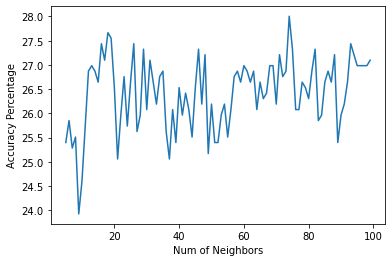

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# removing all the rows of the body_type column that read NA
formatted_data = formatted_data.dropna()

knn_data = formatted_data[['diet', 'drinks', 'drugs', 'sex', 'smokes', 'income']]
knn_labels = formatted_data['body_type']

knn_train, knn_test, knn_train_labels, knn_test_labels = train_test_split(knn_data, knn_labels, test_size=0.2, random_state=1)

# scaling data
scaler = StandardScaler()
scaled_train = scaler.fit_transform(knn_train)
scaled_test = scaler.transform(knn_test)
x_val = range(5,100)
y_val = []
for i in range(5, 100):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(scaled_train, knn_train_labels)
    predictions = knn_classifier.predict(scaled_test)
    y_val.append(accuracy_score(predictions, knn_test_labels) * 100)

plt.plot(x_val, y_val)
plt.xlabel('Num of Neighbors')
plt.ylabel('Accuracy Percentage')
plt.show()
    



In [5]:
class format_data:
    def __init__ (self, dataframe):
        self.dataframe = dataframe
    
    # function that removes all the rows of a dataframe where the target column value in that row is equal to nan
    def remove_rows(self, target_column):
        # creating a list of not null values
        null_values = self.dataframe[target_column].isna()
        rows_to_keep = [i for i in range(len(null_values)) if not null_values[i]]
        print('removing rows...')
        # creating new dataframe that does not contain rows where body type was n/a
        cleaned_data = self.dataframe[self.dataframe.index.isin(rows_to_keep)]
        print('rows removed!')
        self.dataframe = cleaned_data
        return cleaned_data

    # function that removes NaN values, replaces column values based on array of dictionary values, and scales data
    def remove_nan_replace (self, column_arr, replacement_values_arr):
        for column in column_arr:
            for i in range(len(replacement_values_arr)):
                self.dataframe[column].replace(replacement_values_arr[i], inplace=True)
            
            self.dataframe.dropna(axis=0, how='any', inplace=True)
        formatted_data = self.dataframe
        return formatted_data
    
    # function that will return a fitted K neighbors model based on which number of neighbors was the most accurate will also return ideal num of neighbors and the accuracy of the model
    def best_model(self, data, labels, test_percentage=0.2, max_neighbors=100, print_graph=True):
        
        train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=test_percentage, random_state=1)
        
        scaler = StandardScaler()
        scaled_train = scaler.fit_transform(train_data)
        scaled_test = scaler.transform(test_data)

        best_classifier = None
        best_accuracy = 0
        best_n_num = 0 

        if print_graph:
            x_val = range(1,max_neighbors)
            y_val = []
        
            for i in range(1, max_neighbors):

                knn_classifier = KNeighborsClassifier(n_neighbors=i)
                knn_classifier.fit(scaled_train, train_labels)
                predictions = knn_classifier.predict(scaled_test)
                accuracy = accuracy_score(predictions, test_labels) * 100
                y_val.append(accuracy)
                
                if accuracy > best_accuracy: 
                    accuracy = best_accuracy
                    best_classifier = knn_classifier

            # making the graph
            plt.plot(x_val, y_val)
            plt.xlabel('Num of Neighbors')
            plt.ylabel('Accuracy Percentage')
            plt.title('Num of Neighbors vs Accuracy Percentage')
            plt.show()

        else:
            for i in range(1, max_neighbors):
                knn_classifier = KNeighborsClassifier(n_neighbors=i)
                knn_classifier.fit(scaled_train, train_labels)
                predictions = knn_classifier.predict(scaled_test)
                accuracy = accuracy_score(predictions, test_labels) * 100

                if accuracy > best_accuracy: 
                    accuracy = best_accuracy
                    best_classifier = knn_classifier
            
        return best_classifier, best_accuracy, best_n_num


def main():
    profile_data = pd.read_csv('profiles.csv')

    column_array = ['diet', 'drinks', 'drugs', 'sex', 'smokes', 'income', 'body_type']

    replacement_value_arr = [
        # diet
        {'mostly anything': 1, 'anything': 2, 'strictly anything': 3, 'mostly vegetarian': 4, 'mostly other': 5, 'strictly vegetarian': 6, 'vegetarian': 7, 'strictly other': 8, 'mostly vegan': 9, 'other': 10, 'strictly vegan': 11, 'vegan': 12, 'mostly kosher': 13, 'mostly halal': 14, 'strictly halal': 15, 'strictly kosher': 16, 'halal': 17, 'kosher': 18},
        # drinks
        {'not at all': 1, 'rarely': 2, 'socially': 3, 'often': 4, 'very often': 5, 'desperately': 6},
        # drugs
        {'never': 1, 'sometimes': 2, 'often': 3},
        # sex
        {'m': 1, 'f': 0},
        # smokes
        {'no': 1, 'sometimes': 2, 'when drinking': 3, 'yes': 4, 'trying to quit': 5},
        # income
        {-1: 0},
        # body type
        {'average': 1, 'fit': 2, 'athletic': 3, 'thin': 4, 'curvy': 5, 'a little extra': 6, 'skinny': 7, 'full figured': 8, 'overweight': 9, 'jacked': 10, 'used up': 11, 'rather not say': 12}
        ]

    
    data = format_data(profile_data)
    
    # removing the rows where the 'body_type' value is nan
    data.remove_rows('body_type')
    
    # removing all nan values
    formatted_data = data.remove_nan_replace(column_array, replacement_value_arr)

    knn_data = formatted_data[['diet', 'drinks', 'drugs', 'sex', 'smokes', 'income']]
    knn_labels = formatted_data['body_type']

    classifier, best_n, accuracy = data.best_model(knn_data, knn_labels, print_graph=True)

    print(best_n)
    print(accuracy)

main()

removing rows...
rows removed!


/var/folders/xs/t7g22kkd6hd__6jn_93vlw8c0000gn/T/ipykernel_30053/3929530008.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe[column].replace(replacement_values_arr[i], inplace=True)
/var/folders/xs/t7g22kkd6hd__6jn_93vlw8c0000gn/T/ipykernel_30053/3929530008.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.dropna(axis=0, how='any', inplace=True)


NameError: name 'StandardScaler' is not defined